### Rahel Ghebrekidan
### Udacity 
### Data Analyst Nanodegree
### Project 2. Investigating Dataset 
#### June 26, 2016 


## 1. Introduction

In this project I am analyzing the Titanic Dataset obtained from kaggle.com. The dataset presents a sample information of the population aboard in the RMS Titanic ship, which sank on April 15, 1912. There were 2224 people in the ship out of which 1502 were killed in the accident while 722 survived. I am interested to examine the questions below. I have used pandas, numpy, seaborn, matplotlib, pylab and scipy dictionaries to supplement my analysis.

I investigated the data to see some factors that might have influenced the survival of the passengers.                                                
•	Did sex have effect on survival?                                       
•	Did age of the passengers have any contribution on survival?           
•	Was priority given to rescue children?                    
•	Did survival and socio-economic class have any correlation?            
•	Does the amount of fare paid by each passenger has any relation with the passenger's survival? 
## 1.2 Overview of the Dataset

### Variables Description

The dataset is a sample of 891 passengers.The dataset has 12 variables. These are:
1. PassengerId:- consecutive integer number assigned to each individual starting from 1.
2. Survived:- shows either the individual survived from the accident or did not survive. The values for this variable are              1 and 0. 1 represents survived and 0 is for not survived.
3. Pclass:- passenger's Socio-economic class ( where 1= 1st class(upper class), 2 = 2nd class(middle class and 3 = 3rd            class(lower class)
4. Sex: passenger's sex
5. Name :- name of passenger 
6. Age: Age of passenger in years
7. SibSp :- number of siblings or spouse on- board 
8. Parch :-  number of parents or number of children on- boord 
9. Ticket:- Ticket number 
10. Fare:- Ticket fare in pounds.
11. Cabin :- passenger's cabin number 
12. Embarked:- port of embarked. There are three ports in the dataset represented with C, Q and S where C = Cherbourg
   Q = Queenstown  S = Southampton)
   
##### Opening the titanic dataset from CSV file

In [1480]:
import pandas as pd
import numpy as nb
import seaborn as sns
titanic_dataframe = pd.read_csv('titanic_data.csv')
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1485]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


##### Checking the number of rows and columns

In [1486]:
titanic_dataframe.shape

(891, 12)

There are 891 rows(cases) ad 12 columns(variables) in the dataset.

##### Datatype of Variables 

In [1487]:
titanic_dataframe.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Basic Statistics  

In [1488]:
titanic_dataframe[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


The mean age of the passengers was 29.70. The youngest passenger's age was 42 days old and the oldest age was 80 years old. The mean fare paid was £32.20 with standard deviation of 49.69 while the maximum fare was £512.33 whereas some passengers who did not pay any.


# 2. Data Cleaning 

The dataset has some missing values and those values have to be handled.

## 2.1 Variables with missing values

In [1489]:
titanic_dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 177 cases with missing age, 687 cases with missing Cabin number and 2 cases with missing port of Embarked.

## 2.2 Computing Missing Age Values

The dataset has 177 cases with age missing. In order to compute the missing values, it is preferable to see the age distribution and the mean age for female and male. 

#### Distribution of Age

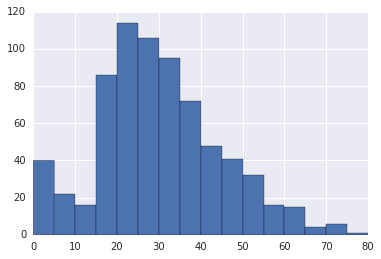

In [1490]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic_dataframe['Age'].dropna().hist(bins=16, range=(0,80), alpha = 1.0)
                                

#### Average age by sex

In [1491]:
female_mean_age= titanic_dataframe[(titanic_dataframe.Sex=='female')& titanic_dataframe.Age]
female_mean_age.Age.mean()

27.915708812260537

In [1492]:
male_mean_age= titanic_dataframe[(titanic_dataframe.Sex=='male')& titanic_dataframe.Age]
male_mean_age.Age.mean()

30.72664459161148

The graph shows the age distribution is approximately normal.The mean age is 28.2 for females and 30.51 for males which has insignificant difference. So, I will replace the age missing values with the sample average mean.

I will create new variable to compute the missing age so that the raw age data will be kept as it is.

In [1493]:
titanic_dataframe['Passengers_age'] = titanic_dataframe['Age']
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [1494]:
average_age = titanic_dataframe.Passengers_age.mean()
average_age

29.69911764705882

In [1495]:
titanic_dataframe.Passengers_age = titanic_dataframe.Passengers_age.fillna(value=average_age)

#### Checking if all the missing age values are filled with the average age

In [1496]:
titanic_dataframe[titanic_dataframe.Passengers_age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers_age


#### Age variable description before and after computation of missing values

In [1497]:
titanic_dataframe.Passengers_age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Passengers_age, dtype: float64

In [1498]:
titanic_dataframe.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The missing age values are now replaced with the average age and there are no missing values. The average age is the same with the average before missing computation. The difference in standard deviation and quartiles is insignificant.  

## 2.3 Dealing with Cabin Missing Values

The missing cabin values are 687 cases. There is no any information which can help to predicate the missing values. So I have decided to fill the missing with 'X99' which represents unknown.

In [1499]:
titanic_dataframe.Cabin = titanic_dataframe.Cabin.fillna(value='X99')

There are two missing values in the variable Embarked. I thought that the fare will help to predict these missing value but since the fare is completely different for passengers who even board in the same port, it is difficult to predict the missing value. So I have discussed to fill with 'X' rather than dropping those cases.

In [1500]:
titanic_dataframe[titanic_dataframe.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers_age


The cabin missing values are filled with X99.

## 2.4 Handling missing Embarked Values

There are two missing value in the Embarked values. As the prediction might not be good to compute the values using the information given, I will refilled the missing values with unknown value('X').

In [1501]:
titanic_dataframe.Embarked = titanic_dataframe.Embarked.fillna(value='X')

In [1502]:
titanic_dataframe[titanic_dataframe.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers_age


All the missing values are now filled.

# 3. Survival and Factors Affecting Survival

## 3.1 Percentage of Survived passengers

According to the Kaggle information, 1502 out 2224 passengers and crew members were killed. The number of survivals were 722.

Adding new variable with Survived category

In [1503]:
Passengers_survival= pd.Categorical(titanic_dataframe["Survived"])
Passengers_survival = Passengers_survival.rename_categories(["Not Survived","Survived"])


In [1504]:
titanic_dataframe['Passengers_survival']= pd.Categorical(titanic_dataframe["Survived"])
titanic_dataframe['Passengers_survival'] = Passengers_survival.rename_categories(["Not Survived","Survived"])
Passengers_survival.describe()

,counts,freqs
categories,,
Not Survived,549,0.616162
Survived,342,0.383838


According to our sample, 38.38% of the passengers survived. 

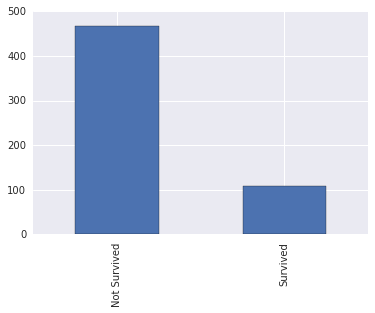

In [1505]:
titanic_dataframe[titanic_dataframe.Sex=='male'].Passengers_survival.value_counts().plot(kind='bar')

Let the the population number of passengers in the titanic be population_Number and the number of population survived be population_Survived_Number and the population survived percentage be the Percentage_Survived. 

In [1506]:
Population_Number = 2224.0

In [1507]:
Population_Survived_Number = 722 

In [1508]:
Percentage_Survived = (Population_Survived_Number/Population_Number)*100
Percentage_Survived


32.46402877697842

The population pecentage of survived passesngers is 32.46% and the sample percentage of survived passengers is 38.38%. The difference between the two percentages is small. This shows the sample is a representative sample.

### 3.2 Statistical Test Preference

I have assumed that the sample is simple random sample. Most of the variables are catagorical variables and for those numerical variables, I will catogorize them for better analysis. Hence, I am going to use Chi-Square test of indepence to check the relationship between the factors I have chosen and survival.

### 3.3 List of Factors that May Affect Survival 

Did the 38.38% passengers survived by chance or there were some factors that affected their survival?

Theoretically the ship could have carried enough lifeboats. Even the chief designer Alexander Carlisle originally planned 48 lifeboats but the number of lifeboats was made 20 to just make it look beautiful and spacious. The 20 lifeboats too small for all hence they might have prioritized to save some and leave otheres.In many accidents people tend to rescue children and female first, this might be true in this incident. Being rich and part of higher socio-economic class, boarded with family members might have also some effect in getting access to the lifeboats. So with the given dataset, I checked if the below factors are related to survival.
1. Sex 
2. Age
3. Fare paid
4. Socio-Economic Class 
5. Number of family members on board



 ## 3.3.1 Sex and Survival 

### Distribution by Sex

In [1509]:
titanic_dataframe['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1510]:
n=891.0

In [1511]:
((titanic_dataframe['Sex'].value_counts())/n)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

Out of 891 passengers and crew in the sample, 577 were male and 314 were female which is 64.75% and 35.24% males and females respectively.

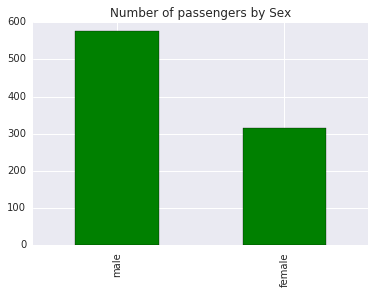

In [1512]:
%matplotlib inline
titanic_dataframe['Sex'].value_counts().plot(kind='bar',title= 'Number of passengers by Sex',color = 'G')

### Proportion of Female and Male Survivals

In [1513]:
survived_by_sex = pd.crosstab(index=titanic_dataframe["Passengers_survival"],
                            columns=titanic_dataframe["Sex"])
survived_by_sex 

Sex,female,male
Passengers_survival,,
Not Survived,81,468
Survived,233,109


233 out of 314 women were survived and 109 out of 577 men were survived. 

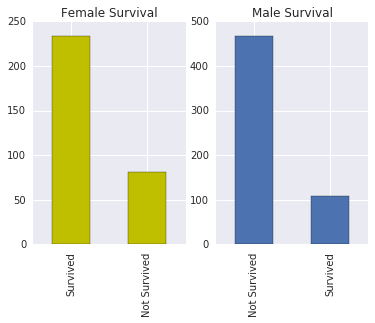

In [1514]:
fig, axs=plt.subplots(1,2)
titanic_dataframe[titanic_dataframe.Sex=='female'].Passengers_survival.value_counts().plot(kind='bar',ax=axs[0],title='Female Survival',color = 'Y')
titanic_dataframe[titanic_dataframe.Sex=='male'].Passengers_survival.value_counts().plot(kind='bar',stacked=True,ax=axs[1],title='Male Survival')

In [1515]:
Survival_by_sex=pd.crosstab(index=titanic_dataframe['Passengers_survival'], columns=titanic_dataframe['Sex'])
Survival_by_sex_ratio = Survival_by_sex.div(survived_by_sex.sum())
Survival_by_sex_percent = Survival_by_sex_ratio*100
Survival_by_sex_percent


Sex,female,male
Passengers_survival,,
Not Survived,25.796178,81.109185
Survived,74.203822,18.890815


The percentage survival of female is 74.20% while the percentage of survival of male is 18.89%. The results show that the proportion of female survived is greater than the proportion of male survived.

### Chi-Square Test - Relation Between Survival and Sex

The proportion from above result shows significant difference between male and female survivers. Using Chi-Square test, it can be checked if the means population by sex are the same or different.

H0: The population mean of female survived is the same as the population mean of male survived
HA: The population mean of female survived is not the same as the population mean of male survived

Let the population mean of female be µsf and the population mean of male be µsm and α be 0.05

H0:  µsf = µsm       
HA:   µsf ≠ µsm      

In [1516]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(titanic_dataframe.Survived, titanic_dataframe.Sex))

(260.71702016732104,
 1.1973570627755645e-58,
 1L,
 array([[ 193.47474747,  355.52525253],
        [ 120.52525253,  221.47474747]]))

The p-value calculated is negligible(1.1973570627755645e-58). So with 95% confidence level, the Null hypothesis can be rejected. Hence, it can be concluded that the populatin mean of female and male survived is not the same. Based on the percentges we can say that population mean of female is greater than the population of male.

## 3.3.2 Age and survival


### Grouping Age
Gouping age is helpful in analysing the data by age. So I am groupoing the age in eight groups with 10 interval in each group. 

In [1517]:
bins=[0,10,20,30,40,50,60,70,80]
Age_group_names = ['(0-10)', '[10-20)', '[20-30)', '[30-40)','[40-50)', '[50-60)', '[60-70)', '[70-80)']
Age_group = pd.cut(titanic_dataframe['Passengers_age'], bins, labels=Age_group_names)
titanic_dataframe['Age_group'] = pd.cut(titanic_dataframe['Age'],bins, labels=Age_group_names)
pd.value_counts(titanic_dataframe['Age_group'])
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers_age,Passengers_survival,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X99,S,22.0,Not Survived,[20-30)
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Survived,[30-40)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X99,S,26.0,Survived,[20-30)
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Survived,[30-40)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X99,S,35.0,Not Survived,[30-40)


In [1518]:
titanic_dataframe.Age_group.value_counts(sort=False)

(0-10)      64
[10-20)    115
[20-30)    230
[30-40)    155
[40-50)     86
[50-60)     42
[60-70)     17
[70-80)      5
dtype: int64

Many of the passengers between 10 and 40 of years age.

###  Proportion of survival by age

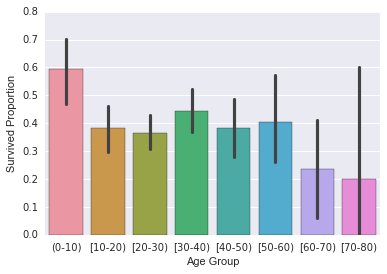

In [1519]:
ax=sns.barplot(x="Age_group", y="Survived",data=titanic_dataframe)
ax.set(xlabel='Age Group', ylabel='Survived Proportion')
plt.show()

In [1520]:
Survival_by_age=pd.crosstab(index=titanic_dataframe['Passengers_survival'], columns=titanic_dataframe['Age_group'])
Survival_by_age_ratio = Survival_by_age.div(Survival_by_age.sum())
Survival_by_age_percent = Survival_by_age_ratio*100
Survival_by_age_percent.round(2)

Age_group,(0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80)
Passengers_survival,,,,,,,,
Not Survived,40.625,61.73913,63.478261,55.483871,61.627907,59.52381,76.470588,80.0
Survived,59.375,38.26087,36.521739,44.516129,38.372093,40.47619,23.529412,20.0


The graph and the table show that the proportion of survival is great among children less or equal to 10 years old. In order to see the difference clearly, it is good to see the proportion of survival for children(less than 10years) and for youngesters and adults(age greater than 10 years)


Children_survived = 59.375
Adults_survived = 36.7593712213
Populating the interactive namespace from numpy and matplotlib


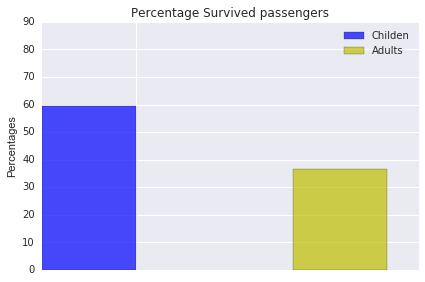

In [1521]:
Number_of_children_survived= len(titanic_dataframe[(titanic_dataframe['Passengers_age']<= 10.00)&(titanic_dataframe['Survived'] == 1)])
Number_of_children= len(titanic_dataframe[(titanic_dataframe['Passengers_age']<= 10.00)])
Number_of_youngesters_adults_survived= len(titanic_dataframe[(titanic_dataframe['Passengers_age']> 10.00)&(titanic_dataframe['Survived'] == 1)])
Number_of_youngesters_adults= len(titanic_dataframe[(titanic_dataframe['Passengers_age']>10.00)])
Children_survived = Number_of_children_survived*1.0/Number_of_children*100
Adults_survived = Number_of_youngesters_adults_survived*1.0/Number_of_youngesters_adults*100
print '{} = {}'.format('Children_survived',Percentage_of_children_survived)
print '{} = {}'.format('Adults_survived',Percentage_of_youngesters_adults_survived)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def plotbar(data1, data2, title, c1, c2, n, l1,l2): 
    n_groups = 1
    Percentage_of_children_survived= (data1)
    Percentage_of_youngesters_adults_survived = (data2)

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.3

    opacity = 0.7
    error_config = {'ecolor': '0.3'}

    rects1 = plt.bar(index, Percentage_of_children_survived, bar_width,
                     alpha=opacity,
                     color=c1,
                     yerr=0,
                     error_kw=error_config,
                     label=l1)

    rects2 = plt.bar(index +0.5 + bar_width, Percentage_of_youngesters_adults_survived, bar_width,
                     alpha=opacity,
                     color=c2,
                     yerr=0,
                     error_kw=error_config,
                     label=l2)

    plt.xlabel('')
    plt.ylabel('Percentages')
    plt.title(title)
    plt.xticks(index + bar_width, (''))
    plt.legend()
    plt.yticks(n)

    plt.tight_layout()
    plt.show()
   
plotbar(Children_survived, Adults_survived,'Percentage Survived passengers','b','y',np.arange(0, 100, 10),'Childen','Adults')

The percentage of children(10years old and below)survived is almost twice the percentage of youngesters and adults survived. 

### Chi-Square test- Children and Adult Survival

As the graph shows and the percentage shows that the proportion of survial among childre aged 10years and below is higher than the other age groups.

Does this result shows that survival was related to age?

Children = 10 years old and below
Adults = greater than 10years

H0: The population mean of children survived is the same as the population mean of adults survived
HA: The population mean of children survived is not the same as the population mean of adults survived

Let the population mean of children be µsc and the population mean of adults be µsa and α be 0.05

H0:  µsc = µsa       
HA:   µsc ≠ µsa

In [1522]:
def Age_below_and_above_10(row):   # catogorizing age below and above 10years
    if row['Age_group'] == '(0-10)':
        return 1
    else:
        return 2
titanic_dataframe['Age_below_and_above_10']= titanic_dataframe.apply(lambda row:Age_below_and_above_10(row), axis=1)
Fare_freq= titanic_dataframe['Age_below_and_above_10'].value_counts(sort=False,dropna=False)
Fare_freq

1     64
2    827
Name: Age_below_and_above_10, dtype: int64

In [1523]:
Age_group_Children_Adult = pd.Categorical(titanic_dataframe["Age_below_and_above_10"])
Age_group_Children_Adult = Age_group_10.rename_categories(['>= 10yrs',"<10yrs",])
titanic_dataframe["Age_group_Children_Adult"]= pd.Categorical(titanic_dataframe["Age_below_and_above_10"])
titanic_dataframe["Age_group_Children_Adult"] = Age_group_10.rename_categories(['>10yrs','<=10yrs'])
titanic_dataframe["Age_group_Children_Adult"].value_counts(sort=False)
titanic_dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passengers_age,Passengers_survival,Age_group,Age_below_and_above_10,Age_group_Children_Adult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X99,S,22.000000,Not Survived,[20-30),2,<=10yrs
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,Survived,[30-40),2,<=10yrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X99,S,26.000000,Survived,[20-30),2,<=10yrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,Survived,[30-40),2,<=10yrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X99,S,35.000000,Not Survived,[30-40),2,<=10yrs
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,X99,Q,29.699118,Not Survived,NaN,2,<=10yrs
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000,Not Survived,[50-60),2,<=10yrs
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,X99,S,2.000000,Not Survived,(0-10),1,>10yrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,X99,S,27.000000,Survived,[20-30),2,<=10yrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,X99,C,14.000000,Survived,[10-20),2,<=10yrs


Both the new created age group(Age_group_Children_Adult) and Survived are catogorical variables. Chi-square test is used.

In [1524]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(titanic_dataframe.Survived, titanic_dataframe.Age_group_Children_Adult))

(11.907976104399694,
 0.00055894095730842531,
 1L,
 array([[  39.43434343,  509.56565657],
        [  24.56565657,  317.43434343]]))

The P-value is 0.00056, so the null hypothesis is rejected with 95% confidence interval. It can be concluded that the population mean survived of children aged 10 years old and below is greater than the population mean survived of adults. So age and survavial has relationship although we can not say that age was the cause as correlation does not imply causation.


In [1525]:
titanic_dataframe.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## 3.3.3 Fare and Survival

### Passengers Fare distribution 


The minimum ticket fare is 0.00 and the maximum is £512.33. The variation in the faire paid is vey high with standard devation of 49.69. The average ticket fare paid was £32.20.

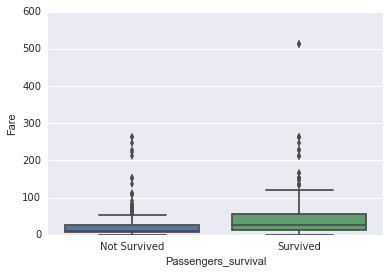

In [1533]:
sns.boxplot(x="Passengers_survival", y="Fare",data=titanic_dataframe);

The graph shows us that there is an outlier value. I will consider this as expensive ticket. I will assume the 0.00 fare as free ticket. 
For better analysis I will group the Fare variable in new created variable.

In [1534]:
def Fare_group(row):   # Creating new variable to group the Fare paid
    if row['Fare']== 0.00:
        return 1
    elif row['Fare'] <= 50.00:
        return 2
    elif row['Fare'] <= 150.00: 
        return 3
    elif row['Fare'] <= 250.00:
        return 4
    elif row['Fare']> 250.00:
        return 5
titanic_dataframe['Fare_group']= titanic_dataframe.apply(lambda row:Fare_group(row), axis=1)
Fare_freq= titanic_dataframe['Fare_group'].value_counts(sort=False,dropna=False)
Fare_freq

1     15
2    716
3    131
4     20
5      9
Name: Fare_group, dtype: int64

The price of many tickets was less than £50.00.

### Proportion of Survival by Fare paid

In [1535]:
Fare_group_Class = pd.Categorical(titanic_dataframe["Fare_group"])
Fare_group_Class = Fare_group_Class.rename_categories(["Free",">=£50",">=£150",">=£250","<£250"])
titanic_dataframe['Fare_group_Class']= pd.Categorical(titanic_dataframe["Fare_group"])
titanic_dataframe['Fare_group_Class'] = Fare_group_Class.rename_categories(["Free",">=£50",">=£150",">=£250","<£250"])
titanic_dataframe.Fare_group_Class.value_counts(sort=False)

Free       15
>=£50     716
>=£150    131
>=£250     20
<£250       9
dtype: int64

In [1536]:
Survival_by_Fare=pd.crosstab(index=titanic_dataframe['Passengers_survival'], columns=titanic_dataframe['Fare_group_Class'])
Survival_by_Fare_ratio = Survival_by_Fare.div(Survival_by_Fare.sum())
Survival_by_Fare_percent = Survival_by_Fare_ratio*100
Survival_by_Fare_percent.round(2)

Fare_group_Class,Free,>=£50,>=£150,>=£250,<£250
Passengers_survival,,,,,
Not Survived,93.333333,67.597765,32.061069,35.0,22.222222
Survived,6.666667,32.402235,67.938931,65.0,77.777778


In [1537]:
### creating new class to recode the fair group removing the £ as it is creating problem
Fare_group_class = pd.Categorical(titanic_dataframe["Fare_group"])
Fare_group_class = Fare_group_class.rename_categories(["Free",">=50",">=150",">=250","<250"])
titanic_dataframe['Fare_group_class']= pd.Categorical(titanic_dataframe["Fare_group"])
titanic_dataframe['Fare_group_class'] = Fare_group_class.rename_categories(["Free",">=50",">=150",">=250","<250"])


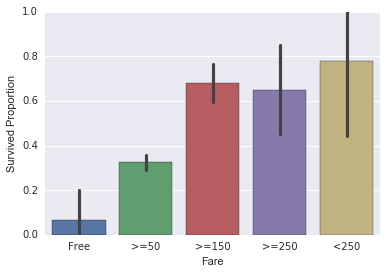

In [1538]:
ax = sns.barplot(x="Fare_group_class", y="Survived",data=titanic_dataframe);
ax.set(xlabel='Fare', ylabel='Survived Proportion')
plt.show()

Only 6.67% of those who did not pay survived in contrast 77.78% of those who paid more than £250 survived. With the exception of those who paid Between £150 and £250 the graph shows clear relationship between increasing number of survivors and higher fare payments. 

#### Chi- Square Test - testing the indepence between Fare paid and survival
H0: The population mean of survived passenger is the same for all the passengers regardless of the fare the paid
HA: The population mean of survived passengers difference with the amount fare paid for ticket.
Population mean of passengers who get free ticket= µ1
Population mean of passengers who paid less or equal to £50.00 = µ2  
Population mean of passengers who paid less or equal to £150.00 = µ3 
Population mean of passengers who paid less or equal to £250.00 = µ4  
Population mean of passengers who paid greater than £250.00 = µ5 
α = 0.05

H0:  µ3 = µ2 = µ3 = µ4       
HA:   µ1 ≠ µ2 ≠ µ3 ≠ µ4

In [1539]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(titanic_dataframe.Survived, titanic_dataframe.Fare_group_Class))

(77.491395304464675,
 5.9189876887433724e-16,
 4L,
 array([[   9.24242424,  441.17171717,   80.71717172,   12.32323232,
            5.54545455],
        [   5.75757576,  274.82828283,   50.28282828,    7.67676768,
            3.45454545]]))

The P-value is almost 5.9189876887433724e-16. So the null hypothesis is not acceptable. In order to avoid type one error, we need to make additional test to see which group is more influencial. However, what we have seen so far will give us confidence to say that the Fare paid has effect on survival. 

## 3.3.4 Socio-economic Class and Survival

In [1540]:
titanic_dataframe.Pclass.value_counts(sort=False)

1    216
2    184
3    491
Name: Pclass, dtype: int64

The passengers were of three class. Upper, Middle and lower class.

In [1541]:
#catogorizing the value of the Pclass
Passengers_Class = pd.Categorical(titanic_dataframe["Pclass"])
Passengers_Class = Passengers_Class.rename_categories(["Upper_Class","Middle_Class","Lower_Class"])
titanic_dataframe['Passengers_Class']= pd.Categorical(titanic_dataframe["Pclass"])
titanic_dataframe['Passengers_Class'] = Passengers_Class.rename_categories(["Upper_Class","Middle_Class","Lower_Class"])
titanic_dataframe.Passengers_Class.value_counts(sort=False)

Upper_Class     216
Middle_Class    184
Lower_Class     491
dtype: int64

In [1542]:
Number_of_UC= len(titanic_dataframe[titanic_dataframe['Passengers_Class'] == 'Upper_Class'])
Number_of_MC=len(titanic_dataframe[titanic_dataframe['Passengers_Class'] == 'Middle_Class'])
Number_of_LC=len(titanic_dataframe[titanic_dataframe['Passengers_Class'] == 'Lower_Class'])
Number_of_UC_survived= len(titanic_dataframe[(titanic_dataframe['Passengers_Class'] == 'Upper_Class') & (titanic_dataframe['Passengers_survival'] == "Survived")])
Number_of_MC_survived= len(titanic_dataframe[(titanic_dataframe['Passengers_Class'] == 'Middle_Class') & (titanic_dataframe['Passengers_survival'] == "Survived")])
Number_of_LC_survived= len(titanic_dataframe[(titanic_dataframe['Passengers_Class'] == 'Lower_Class') & (titanic_dataframe['Passengers_survival'] == "Survived")])
Percentage_of_UC_Survived= (Number_of_UC_survived*1.0/Number_of_UC)*100
Percentage_of_MC_Survived= (Number_of_MC_survived*1.0/Number_of_MC)*100
Percentage_of_LC_Survived= (Number_of_LC_survived*1.0/Number_of_LC)*100
print '{} = {}'.format('Percentage_of_UC_Survived', Percentage_of_UC_Survived)
print '{} = {}'.format('Percentage_of_MC_Survived', Percentage_of_MC_Survived)
print '{} = {}'.format('Percentage_of_LC_Survived', Percentage_of_LC_Survived)

Percentage_of_UC_Survived = 62.962962963
Percentage_of_MC_Survived = 47.2826086957
Percentage_of_LC_Survived = 24.2362525458


(<module 'matplotlib.pyplot' from 'C:\Users\Rahel G G\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>,
 <matplotlib.text.Text at 0x252ec2e8>)

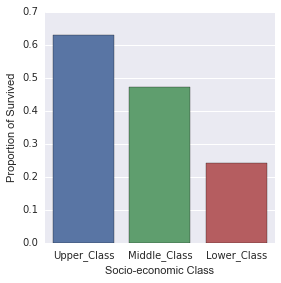

In [1543]:
sns.factorplot(x='Passengers_Class', y= 'Survived', data= titanic_dataframe, kind ="bar", ci=None)
plt.xlabel('Socio-economic Class')
plt,ylabel('Proportion of Survived')

In [1544]:
survived_by_class=pd.crosstab(index=titanic_dataframe['Passengers_survival'], columns=titanic_dataframe['Passengers_Class'])
class_ratio = survived_by_class.div(survived_by_class.sum())
class_percent = class_ratio*100
class_percent

Passengers_Class,Upper_Class,Middle_Class,Lower_Class
Passengers_survival,,,
Not Survived,37.037037,52.717391,75.763747
Survived,62.962963,47.282609,24.236253


The survived percent accross the socio-economic class was 62.96%,47.28% and 24.23% for upper, middle and lower class respectively. It increases with the class. 

#### Chi- Square Test - Testing the Indepence between Passengers Class and Survival
H0: The population mean of survived passenger is the same for all the passengers regardless of the fare the paid
HA: The population mean of survived passenger difference with the amount of ticket fare paid.
Population mean of upper class passenger = µ1
Population mean of middle class passenger = µ2  
Population mean of lower class passenger = µ3 
 
α = 0.05

H0:  µuc = µmc = µlc      
HA:   µuc ≠ µmc ≠ µlc

In [1545]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(titanic_dataframe.Survived, titanic_dataframe.Passengers_Class))

(102.88898875696056,
 4.5492517112987927e-23,
 2L,
 array([[ 133.09090909,  113.37373737,  302.53535354],
        [  82.90909091,   70.62626263,  188.46464646]]))

In addition to the contigency tables, the P-value is almost 0(4.5492517112987927e-23). Hence, I fail to accept the null hypothesis and conclude that the fare paid was related to survival.

### 3.3.5 Presence of Family Members on Board and Survival

#### Frequency of passengers who were with their siblings or spouses. 

In [1546]:
titanic_dataframe.SibSp.value_counts(sort=False)

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

#### Frequency of passenger with their parents or children

In [1547]:
titanic_dataframe.Parch.value_counts(sort=False)

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

I will create a new variable with inorder to see the having any afamily member in the board either spouses, children, siblings or parents.

In [1548]:
titanic_dataframe['Family_member'] = titanic_dataframe['SibSp'] + titanic_dataframe['Parch']
titanic_dataframe.Family_member.value_counts(sort=False)

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Family_member, dtype: int64

Most of the passengers were alone(without any close family memember).

(<module 'matplotlib.pyplot' from 'C:\Users\Rahel G G\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>,
 <matplotlib.text.Text at 0x2582bc88>)

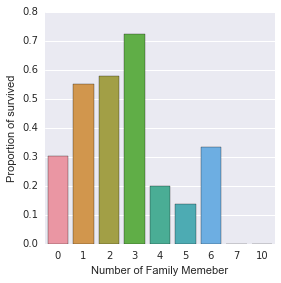

In [1549]:

sns.factorplot(x='Family_member', y= 'Survived', data= titanic_dataframe, kind ="bar", ci=None)
plt.xlabel('Number of Family Memeber')
plt,ylabel('Proportion of survived')


In [1550]:
survived_by_family_members=pd.crosstab(index=titanic_dataframe['Passengers_survival'], columns=titanic_dataframe['Family_member'])
survival_ratio = survived_by_family_members.div(survived_by_family_members.sum())
survival_percent = survival_ratio*100
survival_percent

Family_member,0,1,2,3,4,5,6,7,10
Passengers_survival,,,,,,,,,
Not Survived,69.646182,44.720497,42.156863,27.586207,80.0,86.363636,66.666667,100.0,100.0
Survived,30.353818,55.279503,57.843137,72.413793,20.0,13.636364,33.333333,0.0,0.0


The result shows the survived proportion increases steadily for those who have boarded with one, two and three family members. But the is a sharp fall in the passengers with four and five family mebers with slightly higher for those with six and none for those with seven and ten family members.

# 3.4 Conclusion 

The results shows that some demography and socio-economic factors had relation with survival.Survival and sex were highly correlated. The mean polulation of survived females is greater than the mean population of survived male.When it is compared with adults(greater than 10 years of age) with children less or equal to 10 years old, the percentage was high among the children.Priority might have been given to women and children to get in to the lifeboats first. However the analysis can not imply causation but there were more survivers of children and women. 

In addition to the demographic factors, those from higher socio-ecnomic class and those who paid higher fare survived more than those of lower socio-economic class and those who paid lesser amount or not at all. However this relationship does not explain causation. Weather boarding with other family member or being alone does not have clear relationship to survival.

The demographic and socio-economic factors that have relationship with survival do not neccesaly cause the survival as correlation does not mean causation. There could be many Lurking variables that cause the survival.





## Reference
1. Kaggel,(2012).Titanic: Machine Learning from Disaster: Retrieved from https://www.kaggle.com/c/titanic                                           
2. Stat trek,(2016).Teach yourself Statistics: Chi-Square test of indepence: Retrieved from http://stattrek.com/chi-square-test/independence.aspx       
3. Fowler,D(2011).Titanic Facts: The Life and Lose of the RMS Titanic in Numbers: Retrieved from http://www.titanicfacts.net/titanic-lifeboats.html
4. The Pandas Development Team(2008).Pandas 0.18.1 Documentation:Retrieved from http://pandas.pydata.org/